In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

c:\python27\lib\site-packages\pandas\_libs\__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
c:\python27\lib\site-packages\pandas\__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import (hashtable as _hashtable,
c:\python27\lib\site-packages\pandas\core\dtypes\common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import algos, lib
c:\python27\lib\site-packages\pandas\core\util\hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import hashing, tslib
c:\python27\lib\site-packages\pandas\core\indexes\base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  f

In [3]:
df=pd.read_csv("Econ.csv",names=["year","month","interest","unemp","stock"])

In [4]:
df.head(3)

,year,month,interest,unemp,stock
0,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
1,2017,12,2.75,5.3,1464
2,2017,11,2.5,5.3,1394


In [5]:
df.dtypes

year        object
month       object
interest    object
unemp       object
stock       object
dtype: object

In [6]:
df=df.drop([0],axis=0)
df.head(3)

,year,month,interest,unemp,stock
1,2017,12,2.75,5.3,1464
2,2017,11,2.5,5.3,1394
3,2017,10,2.5,5.3,1357


In [7]:
# change datatypes
df[["year","month","interest","unemp","stock"]]=df[["year","month","interest","unemp","stock"]].astype(float)

In [8]:
df.dtypes

year        float64
month       float64
interest    float64
unemp       float64
stock       float64
dtype: object

In [9]:
df.head(3)

,year,month,interest,unemp,stock
1,2017.0,12.0,2.75,5.3,1464.0
2,2017.0,11.0,2.50,5.3,1394.0
3,2017.0,10.0,2.50,5.3,1357.0


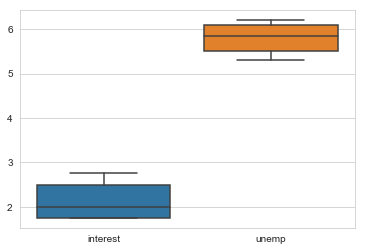

In [24]:
# boxplot for panda data frame
sns.set_style("whitegrid")
ax=sns.boxplot(data=df[['interest','unemp']])

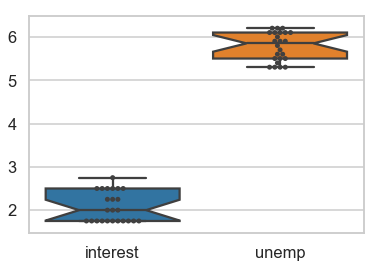

In [31]:
# swarmplot for panda dataframe
sns.set_context("talk")
sns.set_style("whitegrid")

ax=sns.boxplot(data=df[['interest','unemp']],notch=True)
ax=sns.swarmplot(data=df[['interest','unemp']],color="0.25")

In [35]:
print (np.mean(df.interest),np.std(df.interest),np.mean(df.unemp),np.std(df.unemp))

(2.0729166666666665, 0.3421680772011842, 5.775000000000001, 0.3230711995830021)


In [40]:
# labelling datasets

X=df.iloc[:,2:4]
y=df.iloc[:,-1]

In [43]:
print X.shape,y.shape

(24, 2) (24,)


In [44]:
# creating training and test samples from the data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

print X_train.shape,y_test.shape

(19, 2) (5,)


In [46]:
# fit a linear model (linear regression)

from sklearn import linear_model

lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
prediction=lm.predict(X_test)

In [47]:
prediction[1:5]

array([ 877.79021645,  877.79021645, 1212.84562327, 1330.74306848])

In [48]:
y_test[1:5]

19     884.0
20     866.0
9     1159.0
5     1256.0
Name: stock, dtype: float64

Text(0,0.5,'Predictions')

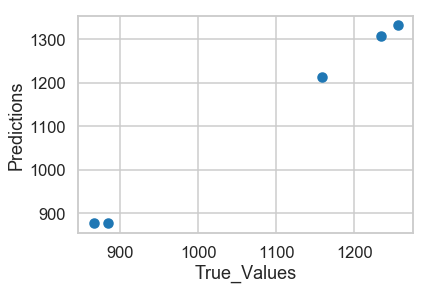

In [51]:
# plot presictions and test
import matplotlib.pyplot as plt
plt.scatter(y_test,prediction)
plt.xlabel("True_Values")
plt.ylabel("Predictions")

In [52]:
print "score;",model.score(X_test,y_test)

score; 0.9046670875642066


In [55]:
# lets check the stats learn summary
import statsmodels.api as sm

X=sm.add_constant(X)
#use OLS
OLSmodel=sm.OLS(y,X).fit()
predictions=OLSmodel.predict(X)

In [57]:
OLSmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stock   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Sun, 04 Nov 2018   Prob (F-statistic):           4.04e-11
Time:                        15:16:45   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1798.4040    899.248      2.000      0.059     -71.685    3668.493
interest     345.5401    111.367      3.103      0.005     113.940     577.140
unemp       -250.1466    117.950     -2.121      0.046    -495.437      -4.856
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.551
Skew:                          -0.612   Prob(JB):                        0.461
Kurtosis:                       3.226   Cond. No.                         394.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
X.head(5)

,const,interest,unemp
1,1.0,2.75,5.3
2,1.0,2.50,5.3
3,1.0,2.50,5.3
4,1.0,2.50,5.3
5,1.0,2.50,5.4


In [60]:
# k fold crossvalidation
# import cv score and predictor from scikit
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics

In [88]:
# after importing cv, specify the k folds

df2=pd.read_csv("Econ.csv",names=["year","month","interest","unemp","stock"])
df2=df2.drop([0],axis=0)
df2[["year","month","interest","unemp","stock"]]=df2[["year","month","interest","unemp","stock"]].astype(float)
X2=df.iloc[:,2:4]
y2=df.iloc[:,-1]

scores = cross_val_score(model, df2, y2, cv=10)
print "Cross-validated scores:", scores

Cross-validated scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


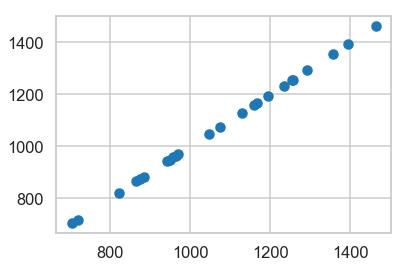

In [73]:
predictions2 = cross_val_predict(model, df, y, cv=4)
plt.scatter(y2, predictions2)

In [70]:
accuracy2 = metrics.r2_score(y2, predictions2)
print "Cross-Predicted Accuracy:", accuracy2

Cross-Predicted Accuracy: 1.0


In [75]:
predictions2

array([1464., 1394., 1357., 1293., 1256., 1254., 1234., 1195., 1159.,
       1167., 1130., 1075., 1047.,  965.,  943.,  958.,  971.,  949.,
        884.,  866.,  876.,  822.,  704.,  719.])

In [76]:
y2

1     1464.0
2     1394.0
3     1357.0
4     1293.0
5     1256.0
6     1254.0
7     1234.0
8     1195.0
9     1159.0
10    1167.0
11    1130.0
12    1075.0
13    1047.0
14     965.0
15     943.0
16     958.0
17     971.0
18     949.0
19     884.0
20     866.0
21     876.0
22     822.0
23     704.0
24     719.0
Name: stock, dtype: float64

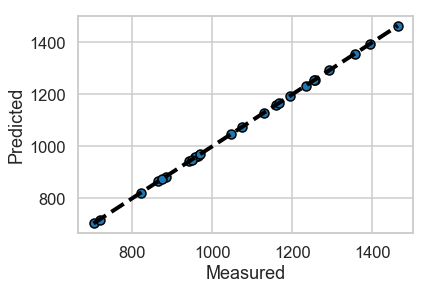

In [89]:

fig, ax = plt.subplots()
ax.scatter(y2, predictions2, edgecolors=(0, 0, 0))
ax.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [90]:
# check the text example 

from sklearn import datasets
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df3 = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y3 = diabetes.target # define the target variable (dependent variable) as y


In [92]:
# create training and testing vars
X3_train, X3_test, y3_train, y3_test = train_test_split(df3, y3, test_size=0.2)

In [95]:
# fit a model
lm3 = linear_model.LinearRegression()
model3 = lm3.fit(X3_train, y3_train)
predictions3 = lm3.predict(X3_test)
print "Score:", model3.score(X3_test, y3_test)

Score: 0.46303017643621414


In [98]:
# Perform 6-fold cross validation
scores3 = cross_val_score(model3, df3, y3, cv=10)
print "Cross-validated scores:", scores3

Cross-validated scores: [0.55614411 0.23056092 0.35357777 0.62190498 0.26587602 0.61819338
 0.41815916 0.43515232 0.43436983 0.68568514]


In [103]:
# Make cross validated predictions
predictions3 = cross_val_predict(model3, df3, y3, cv=10)

accuracy = metrics.r2_score(y3, predictions3)
print "Cross-Predicted Accuracy:", accuracy

Cross-Predicted Accuracy: 0.4942511806188349


In [113]:
model3.coef_

array([   18.81261657,  -191.90121611,   455.30815114,   292.19507942,
       -1081.39313485,   700.31885476,   253.96553087,   227.39252727,
         921.21268023,    43.36227332])

In [114]:
model3.intercept_

147.43216124943874

In [115]:
df3.head(5)

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
